In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Исходные данные

In [80]:
x = np.array(
    [128, 132, 129, 126, 130, 128, 129, 129, 127, 130, 128, 131, 127, 129, 127, 131, 130, 127, 130, 128, 129, 129, 126,
     128, 128, 130, 129, 127, 131, 128, 130, 126, 130, 129, 129, 127, 129, 126, 130, 126, 130, 129, 127, 129, 130, 128,
     131, 127, 132, 129, 129, 129, 130, 129, 130, 129, 128, 129, 127, 131, 129, 131, 128, 132, 128, 126, 129, 128, 128,
     129, 127, 128, 128, 130, 128, 127, 129, 128, 131, 129, 127, 130, 126, 131, 130, 129, 129, 127, 132, 127, 130, 128,
     128, 130, 129, 131, 127, 129, 130, 131, ])

y = np.array(
    [25, 31, 27, 25, 28, 27, 26, 28, 26, 27, 26, 28, 27, 28, 26, 28, 28, 26, 27, 27, 26, 28, 25, 27, 26, 27, 26, 26, 29,
     27, 29, 25, 27, 27, 27, 26, 28, 25, 29, 25, 28, 27, 26, 29, 28, 27, 29, 26, 30, 29, 27, 26, 28, 27, 28, 26, 25, 28,
     27, 28, 28, 19, 18, 31, 26, 25, 27, 27, 28, 26, 26, 26, 27, 29, 26, 26, 28, 27, 30, 26, 27, 28, 27, 30, 29, 28, 27,
     26, 30, 23, 28, 27, 26, 28, 28, 28, 26, 28, 28, 29, ])

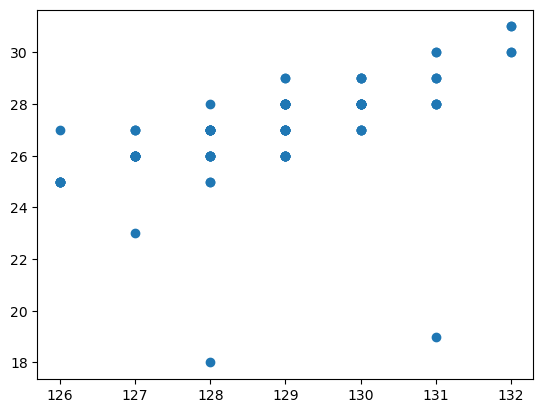

In [81]:
plt.scatter(x, y)

# Группирование данных по интервалам

### Для x

In [0]:
N = 7
n = x.__len__()

In [82]:
h_x = (np.max(x) - np.min(x)) / (N - 1)
h_x

1.0

In [83]:
x_intervals = [np.min(x) - h_x / 2, ]
for i in range(1, N + 1):
    x_intervals.append(x_intervals[i - 1] + h_x)

x_intervals

[125.5, 126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5]

In [142]:
x_avgs = [x_intervals[0] + h_x / 2, ]
for i in range(2, N + 1):
    x_avgs.append((x_intervals[i - 1] + x_intervals[i]) / 2)

x_avgs

[126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0]

In [84]:
m_x = []
for i in range(N):
    m_i = 0
    for x_i in x:
        if i == N - 1:
            if x_intervals[i] <= x_i <= x_intervals[i + 1]:
                m_i += 1
        else:
            if x_intervals[i] <= x_i < x_intervals[i + 1]:
                m_i += 1
    m_x.append(m_i)

m_x = np.array(m_x)
m_x

array([ 7, 15, 19, 27, 18, 10,  4])

In [86]:
p_x = m_x / n
p_x

array([0.07, 0.15, 0.19, 0.27, 0.18, 0.1 , 0.04])

In [91]:
f_x = p_x / h_x
f_x

array([0.07, 0.15, 0.19, 0.27, 0.18, 0.1 , 0.04])

Проверка условий

In [85]:
np.sum(m_x) == n

True

In [87]:
np.sum(p_x) == 1

True

### Для y

In [92]:
h_y = (np.max(y) - np.min(y)) / (N - 1)
h_y

2.1666666666666665

In [93]:
y_intervals = [np.min(y) - h_y / 2, ]
for i in range(1, N + 1):
    y_intervals.append(y_intervals[i - 1] + h_y)

y_intervals

[16.916666666666668,
 19.083333333333336,
 21.250000000000004,
 23.41666666666667,
 25.58333333333334,
 27.750000000000007,
 29.916666666666675,
 32.08333333333334]

In [141]:
y_avgs = [y_intervals[0] + h_y / 2, ]
for i in range(2, N + 1):
    y_avgs.append((y_intervals[i - 1] + y_intervals[i]) / 2)

y_avgs

[18.0,
 20.16666666666667,
 22.333333333333336,
 24.500000000000007,
 26.66666666666667,
 28.833333333333343,
 31.000000000000007]

In [94]:
m_y = []
for i in range(N):
    m_i = 0
    for y_i in y:
        if i == N - 1:
            if y_intervals[i] <= y_i <= y_intervals[i + 1]:
                m_i += 1
        else:
            if y_intervals[i] <= y_i < y_intervals[i + 1]:
                m_i += 1
    m_y.append(m_i)

m_y = np.array(m_y)
m_y

array([ 2,  0,  1,  8, 49, 34,  6])

In [96]:
p_y = m_y / n
p_y

array([0.02, 0.  , 0.01, 0.08, 0.49, 0.34, 0.06])

In [98]:
f_y = p_y / h_y
f_y

array([0.00923077, 0.        , 0.00461538, 0.03692308, 0.22615385,
       0.15692308, 0.02769231])

Проверка условий

In [95]:
np.sum(m_y) == n

True

In [97]:
np.sum(p_y) == 1

True

# Статистический ряд и графики

In [143]:
df = pd.DataFrame(
    data={'x_avg_i': x_avgs, 'm_x': m_x, 'p_x': p_x, 'f_x': f_x, 'y_avg_i': y_avgs, 'm_y': m_y,
          'p_y': p_y, 'f_y': f_y})
df.T

,0,1,2,3,4,5,6
x_avg_i,126.000000,127.000000,128.000000,129.000000,130.000000,131.000000,132.000000
m_x,7.000000,15.000000,19.000000,27.000000,18.000000,10.000000,4.000000
p_x,0.070000,0.150000,0.190000,0.270000,0.180000,0.100000,0.040000
f_x,0.070000,0.150000,0.190000,0.270000,0.180000,0.100000,0.040000
y_avg_i,18.000000,20.166667,22.333333,24.500000,26.666667,28.833333,31.000000
m_y,2.000000,0.000000,1.000000,8.000000,49.000000,34.000000,6.000000
p_y,0.020000,0.000000,0.010000,0.080000,0.490000,0.340000,0.060000
f_y,0.009231,0.000000,0.004615,0.036923,0.226154,0.156923,0.027692


## Графики

### Для x

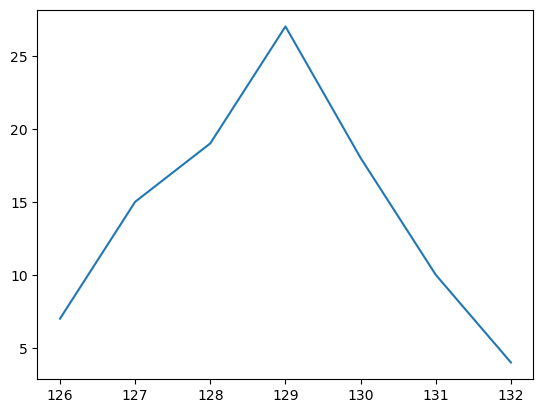

In [144]:
plt.plot(df['x_avg_i'], df['m_x'])

<BarContainer object of 7 artists>

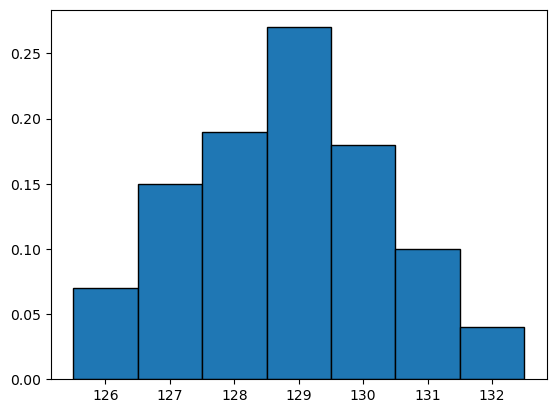

In [152]:
plt.bar(df['x_avg_i'], height=df['f_x'], width=np.array(x_intervals[:-1]) - np.array(x_intervals[1:]),
        edgecolor='black')

### Для y

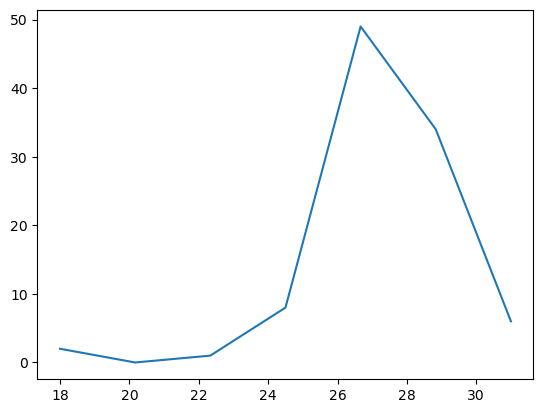

In [145]:
plt.plot(df['y_avg_i'], df['m_y'])

<BarContainer object of 7 artists>

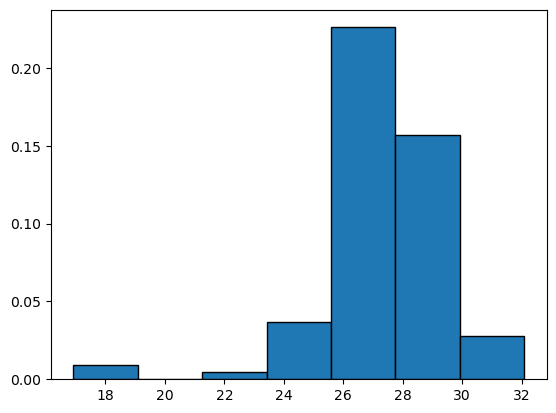

In [153]:
plt.bar(df['y_avg_i'], height=df['f_y'], width=np.array(y_intervals[:-1]) - np.array(y_intervals[1:]),
        edgecolor='black')

# Числовые характеристики

### Для x

In [155]:
m_k_x = np.array([np.sum(np.power(x_avgs, k) * m_x) for k in range(1, 5)]) / n
m_k_x

array([1.2880000e+02, 1.6591760e+04, 2.1376165e+06, 2.7544055e+08])

In [177]:
x_sample = m_k_x[0]
x_sample

128.8

In [178]:
s_2_x = m_k_x[1] - x_sample ** 2
s_2_x

2.319999999996071

In [179]:
s_2_x_corrected = (s_2_x * n) / (n - 1)
s_2_x_corrected

2.3434343434303746

In [180]:
a_sample_x = (m_k_x[2] - 3 * m_k_x[0] * m_k_x[1] + 2 * m_k_x[0] ** 3) / s_2_x_corrected ** 3
a_sample_x

0.013986663798819484

In [187]:
excess_x = (m_k_x[3] - 4 * m_k_x[0] * m_k_x[2] + 6 * m_k_x[0] ** 2 * m_k_x[1] - 3 * m_k_x[
    0] ** 4) / s_2_x_corrected ** 4 - 3
excess_x

-2.573401948794857

### Для y

In [188]:
m_k_y = np.array([np.sum(np.power(y_avgs, k) * m_y) for k in range(1, 5)]) / n
m_k_y

array([2.72733333e+01, 7.48255000e+02, 2.06339456e+04, 5.71600135e+05])

In [189]:
y_sample = m_k_y[0]
y_sample

27.27333333333334

In [190]:
s_2_y = m_k_y[1] - y_sample ** 2
s_2_y

4.4202888888888765

In [191]:
s_2_y_corrected = (s_2_y * n) / (n - 1)
s_2_y_corrected

4.464938271604926

In [192]:
a_sample_y = (m_k_y[2] - 3 * m_k_y[0] * m_k_y[1] + 2 * m_k_y[0] ** 3) / s_2_y_corrected ** 3
a_sample_y

-0.16373615920832207

In [194]:
excess_y = (m_k_y[3] - 4 * m_k_y[0] * m_k_y[2] + 6 * m_k_y[0] ** 2 * m_k_y[1] - 3 * m_k_y[
    0] ** 4) / s_2_y_corrected ** 4 - 3
excess_y

-2.5666106362793006

# Выборочный коэффициент корреляции

In [281]:
n_corr = []
for i in range(N):
    n_i = []
    for j in range(N):
        n_i_j = 0

        for k in range(n):
            # это условие неверно, но да чёрт с ним -- работает же)))
            if x_intervals[i] <= x[k] < x_intervals[i + 1] and y_intervals[j] <= y[k] < y_intervals[j + 1]:
                n_i_j += 1
        n_i.append(n_i_j)
    n_corr.append(n_i)
np.sum(n_corr)

100

In [282]:
n_corr

[[0, 0, 0, 6, 1, 0, 0],
 [0, 0, 1, 0, 14, 0, 0],
 [1, 0, 0, 2, 15, 1, 0],
 [0, 0, 0, 0, 15, 12, 0],
 [0, 0, 0, 0, 4, 14, 0],
 [1, 0, 0, 0, 0, 7, 2],
 [0, 0, 0, 0, 0, 0, 4]]

In [283]:
r_sample = (np.sum(
    [x_avgs[i] * y_avgs[j] * n_corr[i][j] for i in range(N) for j in range(N)]) - n * x_sample * y_sample) / (
                   n * np.sqrt(s_2_x_corrected * s_2_y_corrected))
r_sample

0.5666675455990345

In [284]:
r = (np.sum(x * y) / n - np.sum(x) / n * np.sum(y) / n) / (np.sqrt(s_2_x_corrected * s_2_y_corrected))
r

0.49587274584893215